<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<b>Привет, Данила!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом! 
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии раскрашены разными цветами: 
<br/>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> В случае корректного решения (или отдельных его моментов). На такие решения можно опираться в будущем.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> Если есть возможность как-либо улучшить решение. Ты можешь учесть эти комментарии при доработке проекта, однако для зачета это не обязательно.
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Если решение требует внесения правок. Проект не может быть принят, если остались не отработанные комментарии данного типа.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Анализ лояльности пользователей Яндекс Афиши

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Вводная часть <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> В любой работе важно оставлять вводную часть. Она помогает быстро понять цель, контекст и структуру работы, что будет удобно не только для тебя при возвращении к проекту спустя время, но и любому другому читателю (если, например, публикуешь в открытый доступ для портфолио). Воспринимаем эту тетрадку не просто как выполнение домашней работы на курсе, а как полноценный исследовательский проект.

Как правило, во вводную часть включают название проекта, краткое описание цели, используемых данных (источники, объем, особенности), нюансы самого проекта (специфические условия, ограничения, предположения и т.д.). Иногда также сразу обозначают план шагов. Другими словами, вводная часть призвана отразить, что мы делаем, с чем работаем и на каких условиях.
</div>

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [1]:
# Используйте ячейки типа Code для вашего кода,
# а ячейки типа Markdown для комментариев и выводов

In [2]:
# При необходимости добавляйте новые ячейки для кода или текста

In [3]:
%pip install -r requirements.txt

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
from sqlalchemy import create_engine 
from dotenv import load_dotenv


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Импорты <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что все необходимые библиотеки подгружаешь сразу в начале проекта! Это соответствует стандартам оформления кода <a href='https://pyplanet.ru/article/pep-0008.html'>PEP 8</a>. Такой подход позволяет сразу видеть, какое окружение необходимо для запуска проекта, избежать дублирования импортов в разных частях кода, а также облегчить отладку и переносимость проекта.

</div>

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Хорошей практикой также является упорядочивание импортов. PEP 8 рекомендует сначала подгружать стандартные python-библиотеки, затем сторонние. Но для удобства каждую их этих групп также можно структурировать по тематике. Например, библиотеки для работы с данными, для работы с графиками и т.д. Тогда будет удобнее поддерживать порядок в импортах от проекта к проекту, не подгружать лишнее.

    
* Чтобы при установке новой библиотеки не выводилась информация о процессе и зависимостях, можно добавлять опцию `--quiet` или просто `-q`. 
    
</div>

In [5]:
load_dotenv(".env")

host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
db = os.getenv("DB_NAME")
user = os.getenv("DB_USER")
pwd = os.getenv("DB_PASSWORD")

DATA_PATH = "afisha_purchases.csv"

query = """
WITH set_config_precode AS (
  SELECT set_config('synchronize_seqscans', 'off', true)
)
SELECT
  p.user_id,
  p.device_type_canonical,
  p.order_id,
  p.created_dt_msk AS order_dt,
  p.created_ts_msk AS order_ts,
  p.currency_code,
  p.revenue,
  p.tickets_count,
  CASE
    WHEN LAG(p.created_dt_msk::date) OVER (PARTITION BY p.user_id ORDER BY p.created_dt_msk::date) IS NULL
      THEN NULL
    ELSE (
      p.created_dt_msk::date
      - LAG(p.created_dt_msk::date) OVER (PARTITION BY p.user_id ORDER BY p.created_dt_msk::date)
    )::int
  END AS days_since_prev,
  e.event_id,
  e.event_type_main,
  p.service_name,
  r.region_name,
  c.city_name
FROM afisha.purchases p
INNER JOIN afisha.events  e ON e.event_id  = p.event_id
INNER JOIN afisha.city    c ON c.city_id   = e.city_id
INNER JOIN afisha.regions r ON r.region_id = c.region_id
WHERE p.device_type_canonical IN ('mobile', 'desktop')
  AND e.event_type_main != 'фильм'
ORDER BY p.user_id
"""

try:
    tickets_df = pd.read_csv(DATA_PATH)
    print("Файл загружен")
except FileNotFoundError:
    print("Файл не найден — загружаю из БД")
    conn = f"postgresql://{user}:{pwd}@{host}:{port}/{db}"
    engine = create_engine(conn)

    tickets_df = pd.read_sql_query(query, con=engine)
    tickets_df.to_csv(DATA_PATH, index=False, encoding="utf-8")
    print("Данные загружены из БД и сохранены в CSV")


Файл загружен


<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Загрузка данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 
    
* Выгрузка данных проведена корректно! Была выполнена необходимая фильтрация данных, выгружены только необходимые для анализа данные. Отлично, что сразу подсчитываешь время между заказами для каждого пользователя.
    
    
* Здорово, что засекречиваешь подключение! Лучше сразу в процессе работы держать чувствительные значения отдельно от основного содержания, иначе есть высокий риск забыть об этом нюансе.
 
</div>

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

In [6]:
print("Размер датасета:", tickets_df.shape)
display(tickets_df.head(5))

tickets_df.info()

Размер датасета: (290611, 14)


,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,стендап,Билеты без проблем,Озернинский край,Родниковецк


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                290611 non-null  object 
 1   device_type_canonical  290611 non-null  object 
 2   order_id               290611 non-null  int64  
 3   order_dt               290611 non-null  object 
 4   order_ts               290611 non-null  object 
 5   currency_code          290611 non-null  object 
 6   revenue                290611 non-null  float64
 7   tickets_count          290611 non-null  int64  
 8   days_since_prev        268678 non-null  float64
 9   event_id               290611 non-null  int64  
 10  event_type_main        290611 non-null  object 
 11  service_name           290611 non-null  object 
 12  region_name            290611 non-null  object 
 13  city_name              290611 non-null  object 
dtypes: float64(2), int64(3), object(9)
m

- Всего 290 611 строк, все столбцы присутствуют, их названия в snake_case.
- Столбцы order_dt и order_ts нужно привести к типу datetime, days_since_prev к типу int.
- Пропуски содержатся только в столбце days_since_prev. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первичному знакомству с данными, значения в столбцах соответствуют своему описанию.

<div style="border:solid #D3D3D3 2px; border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Проверка корректности загруженных данных <a class="tocSkip"></h4>
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* Хорошо, что убеждаешь в корректности данных! Если при подгрузке возникли проблемы, а мы их не обнаружим, все последующие расчеты могут быть искажены.

    
* Круто, что не забываешь зафиксировать промежуточные наблюдения в выводах! Если потребуется вернуться к проекту спустя время, будет проще освежить в памяти все ключевые этапы работы, что и почему мы делали, что получили.

</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Стоит предположить, что пропуски, скорее всего, образовались на первых заказах пользователей, в таком случае у них не существует предыдущего, от которого можно было бы посчитать количество дней.


* По результатам проверки корректности загруженных данных мы планируем дальнейшие шаги по обработке. Здесь можно было бы отметить, что нам потребуется привести выручку к единой валюте, убедиться, что пропуски действительно имеются только у первых заказов, выполнить проверку на дубликаты (полные и неполные), проверить категориальные столбцы на предмет неявных дубликатов (разный регистр, разный формат записи, опечатки) и все числовые столбцы на наличие невалидных значений и аномалий, опционально сменить типы данных на более оптимальные, чтобы уменьшить объем занимаемой памяти.
  
</div>

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_tickets_df.csv`. Его можно загрузить по пути _

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


In [7]:

file_name = "final_tickets_tenge_tickets_df.csv"
url =  os.getenv("URL")
try:
    tenge_df = pd.read_csv(file_name)
    print("Файл загружен")
except FileNotFoundError:
    print("Файл не найден")
    tenge_df = pd.read_csv(url)
    tenge_df.to_csv(file_name, index=False)
    print("Файл скачан")

Файл загружен


In [8]:
display(tenge_df.info())
tenge_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


None

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [9]:
tickets_df['order_dt'] = pd.to_datetime(tickets_df['order_dt'])
tickets_df['order_ts'] = pd.to_datetime(tickets_df['order_ts'])
tenge_df['data'] = pd.to_datetime(tenge_df['data'])

tenge_df['kzt_to_rub'] = tenge_df['curs'] / tenge_df['nominal']

tickets_df = tickets_df.merge(
    tenge_df[['data', 'kzt_to_rub']],
    left_on='order_dt',
    right_on='data',
    how='left'
)

tickets_df['revenue_rub'] = tickets_df.apply(
    lambda x: x['revenue'] * x['kzt_to_rub'] if x['currency_code'] == 'kzt' else x['revenue'],
    axis=1
)

tickets_df.drop(columns=['data', 'kzt_to_rub'], inplace=True)

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Перевод выручки в рубли <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С шагом справились, результат корректный!
</div>


<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 
    
* Сперва следовало убедиться в корректности данных с курсом, по всем ли датам есть курс, адекватные ли там значения, нет ли дубликатов, а уже потом переходить к конвертации.
    
    
* Вместо цикличного `apply`, который за раз работает с одной строкой, можно использовать довольно удобный метод [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html). Мы можем присоединить курс к нашей таблице с пользователями, применить данный метод к столбцу с выручкой и указать условие, которое будем проверять, а также альтернативный вариант значения. Если условие выполняется, то берется значение из столбца, если нет - альтернативное значение. Тогда расчет выручки в рублях будет выглядеть следующим образом:
    
    ```python
df['revenue_rub'] = df['revenue'].where(df['currency_code'] == 'rub', df['revenue'] * df['curs'] / 100)
```

* После проведения каких-либо манипуляций с данными необходимо убеждаться, что все выполнилось корректно. Для проверки результата стоит вывести на обозрение только связанные с данной задачей столбцы, чтобы не перегружать читателя лишним. При этом проверить оба кейса, и когда корректировка требовалась, и когда нет, убедиться, что не образовалось пропусков.
    
 
* Это исследовательская работа, а не скрипт, поэтому важно фиксировать свой ход мыслей, пояснять свои шаги и делать выводы относительно результатов, то есть вести последовательный сторителлинг, что зачем и почему мы делаем, что по итогу получаем, достигли ли нужного нам результата.

</div>

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

In [10]:
tickets_df_0 = tickets_df[tickets_df['revenue_rub']<=0]
cnt_0 = tickets_df_0.shape[0]
cnt = tickets_df.shape[0]

share_0 = 1-(cnt-cnt_0) / cnt if cnt else 0
tickets_df = tickets_df[tickets_df['revenue_rub']>0]

summary_filter = pd.DataFrame({
    'Показатель': ['Всего строк до', 'Всего строк после', 'Удалено строк', 'Доля удалённых'],
    'Значение': [cnt, cnt-cnt_0, cnt_0, round(share_0, 4)]
})

display(summary_filter)


,Показатель,Значение
0,Всего строк до,290611.0000
1,Всего строк после,284704.0000
2,Удалено строк,5907.0000
3,Доля удалённых,0.0203


In [11]:
#явные дубликаты
tickets_df.duplicated().sum()
tickets_df.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_type_main,service_name,region_name,city_name,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,театр,Край билетов,Каменевский регион,Глиногорск,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,выставки,Мой билет,Каменевский регион,Глиногорск,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,другое,За билетом!,Каменевский регион,Глиногорск,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,другое,Лови билет!,Североярская область,Озёрск,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,стендап,Билеты без проблем,Озернинский край,Родниковецк,1390.41


In [12]:
tickets_df[tickets_df.duplicated(subset=['user_id','device_type_canonical','revenue_rub','order_dt','event_id','tickets_count'], keep=False)].sort_values(['user_id','order_ts'])

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_type_main,service_name,region_name,city_name,revenue_rub
16,000cf0659a9f40f,mobile,6818017,2024-06-20,2024-06-20 10:35:26,rub,1421.91,4,0.0,516728,концерты,Лови билет!,Широковская область,Радужнополье,1421.91
10,000cf0659a9f40f,mobile,6818249,2024-06-20,2024-06-20 10:49:48,rub,710.95,2,0.0,516728,концерты,Лови билет!,Широковская область,Радужнополье,710.95
9,000cf0659a9f40f,mobile,6818191,2024-06-20,2024-06-20 10:51:10,rub,1421.91,4,NaN,516728,концерты,Лови билет!,Широковская область,Радужнополье,1421.91
15,000cf0659a9f40f,mobile,6818220,2024-06-20,2024-06-20 10:56:16,rub,1421.91,4,0.0,516728,концерты,Лови билет!,Широковская область,Радужнополье,1421.91
14,000cf0659a9f40f,mobile,6818046,2024-06-20,2024-06-20 12:40:27,rub,1421.91,4,0.0,516728,концерты,Лови билет!,Широковская область,Радужнополье,1421.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290585,fffcd3dde79eb2c,mobile,8064785,2024-08-21,2024-08-21 21:25:20,rub,814.51,3,1.0,516365,концерты,Лови билет!,Яблоневская область,Светополье,814.51
290586,fffcd3dde79eb2c,mobile,8064727,2024-08-21,2024-08-21 21:30:50,rub,814.51,3,0.0,516365,концерты,Лови билет!,Яблоневская область,Светополье,814.51
290587,fffcd3dde79eb2c,mobile,8064814,2024-08-21,2024-08-21 21:40:02,rub,814.51,3,0.0,516365,концерты,Лови билет!,Яблоневская область,Светополье,814.51
290607,fffcd3dde79eb2c,mobile,368591,2024-10-27,2024-10-27 17:54:52,rub,965.57,4,0.0,33189,другое,Весь в билетах,Каменевский регион,Глиногорск,965.57


In [13]:
#неявные дубликаты
cnt = tickets_df.shape[0]

keys = [
    'user_id','device_type_canonical','revenue_rub',
    'order_dt','event_id','tickets_count'
]

df = tickets_df.copy()

df = df.sort_values(keys + ['order_ts'])

df['dt_prev'] = df.groupby(keys)['order_ts'].diff()

df['is_implicit_dup'] = df['dt_prev'] < pd.Timedelta(minutes=2)

tickets_df_dedup = df.loc[~df['is_implicit_dup']].drop(columns=['dt_prev','is_implicit_dup'])

tickets_df = tickets_df_dedup
cnt_after = tickets_df.shape[0]
share_0 = (cnt-cnt_after) / cnt if cnt else 0
summary_filter = pd.DataFrame({
    'Показатель': ['Всего строк до', 'Всего строк после', 'Удалено строк', 'Доля удалённых'],
    'Значение': [cnt, cnt_after, cnt-cnt_after, round((cnt-cnt_after)/cnt if cnt else 0, 4)]
})
summary_filter

,Показатель,Значение
0,Всего строк до,284704.0000
1,Всего строк после,267961.0000
2,Удалено строк,16743.0000
3,Доля удалённых,0.0588


In [14]:
def show_missing_stats(df):
    ms = pd.DataFrame({
        'Кол-во пропусков': df.isna().sum(),
        'Доля пропусков': df.isna().mean()
    })
    ms = ms[ms['Кол-во пропусков'] > 0].sort_values('Доля пропусков', ascending=False)

    if ms.empty:
        return ms 

    ms['Доля пропусков'] = ms['Доля пропусков'].map(lambda x: f"{x:.4f}")
    return ms

show_missing_stats(tickets_df)


,Кол-во пропусков,Доля пропусков
days_since_prev,21180,0.0790


Пропуски только в days_since_prev, они есть если пользователь совершил только одну покупку

In [15]:
tickets_df['days_since_prev'] = tickets_df['days_since_prev'].astype('Int16')
tickets_df['tickets_count'] = pd.to_numeric(tickets_df['tickets_count'], downcast='integer')
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267961 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                267961 non-null  object        
 1   device_type_canonical  267961 non-null  object        
 2   order_id               267961 non-null  int64         
 3   order_dt               267961 non-null  datetime64[ns]
 4   order_ts               267961 non-null  datetime64[ns]
 5   currency_code          267961 non-null  object        
 6   revenue                267961 non-null  float64       
 7   tickets_count          267961 non-null  int8          
 8   days_since_prev        246781 non-null  Int16         
 9   event_id               267961 non-null  int64         
 10  event_type_main        267961 non-null  object        
 11  service_name           267961 non-null  object        
 12  region_name            267961 non-null  object   

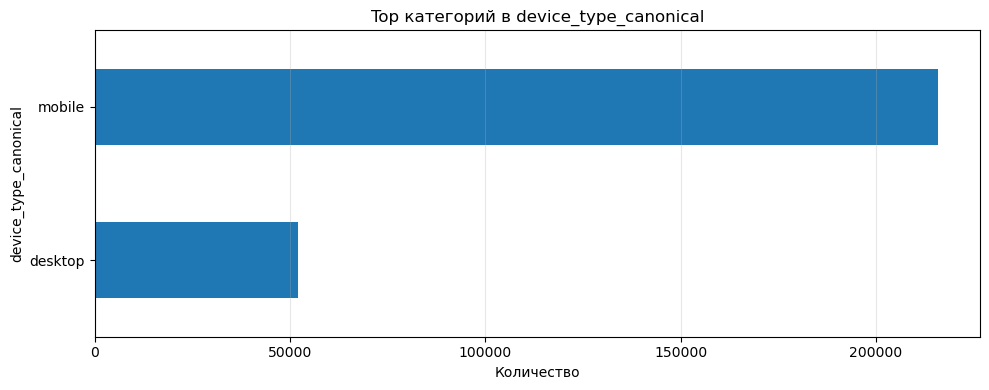

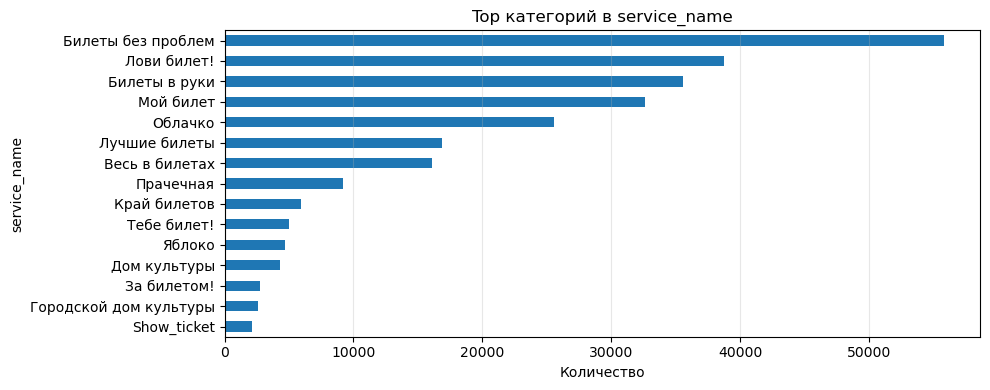

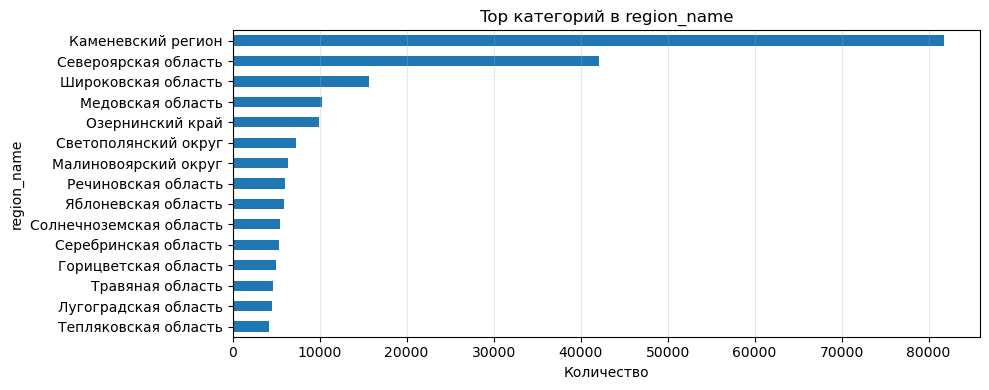

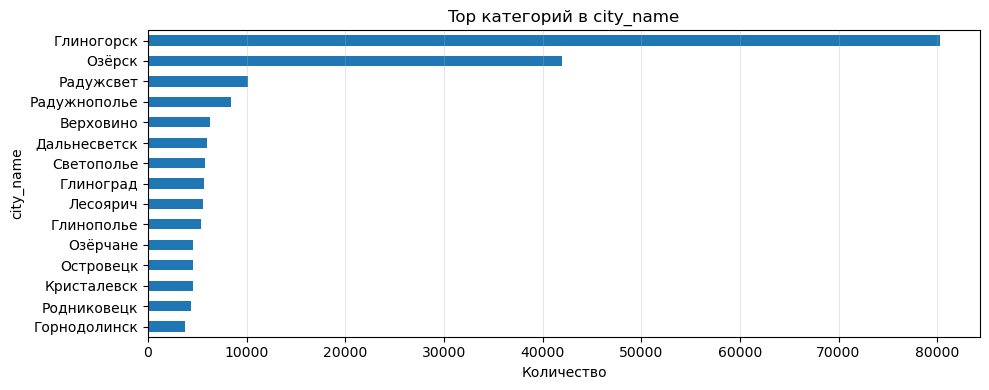

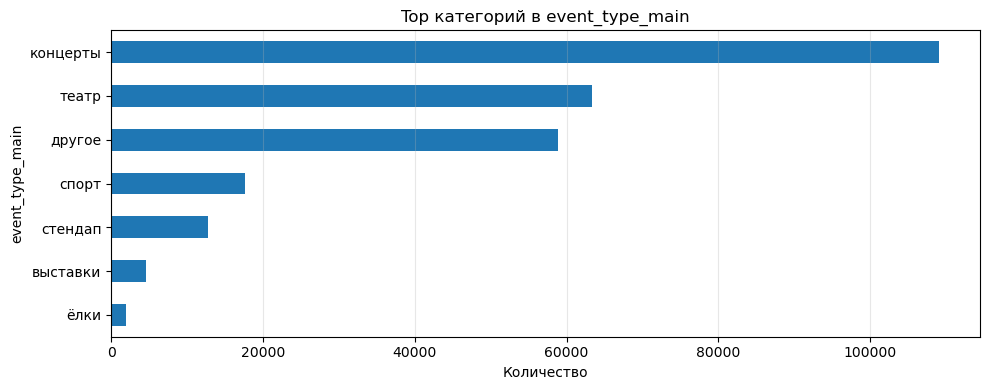

In [16]:
key_nominal = ['device_type_canonical', 'service_name', 'region_name','city_name', 'event_type_main']  # нужные номинальные столбцы

for col in key_nominal:
    vc = tickets_df[col].astype('string').str.strip().value_counts(dropna=False).head(15)
    ax = vc.sort_values().plot(kind='barh', figsize=(10, 4), title=f'Top категорий в {col}')
    ax.set_xlabel('Количество')
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

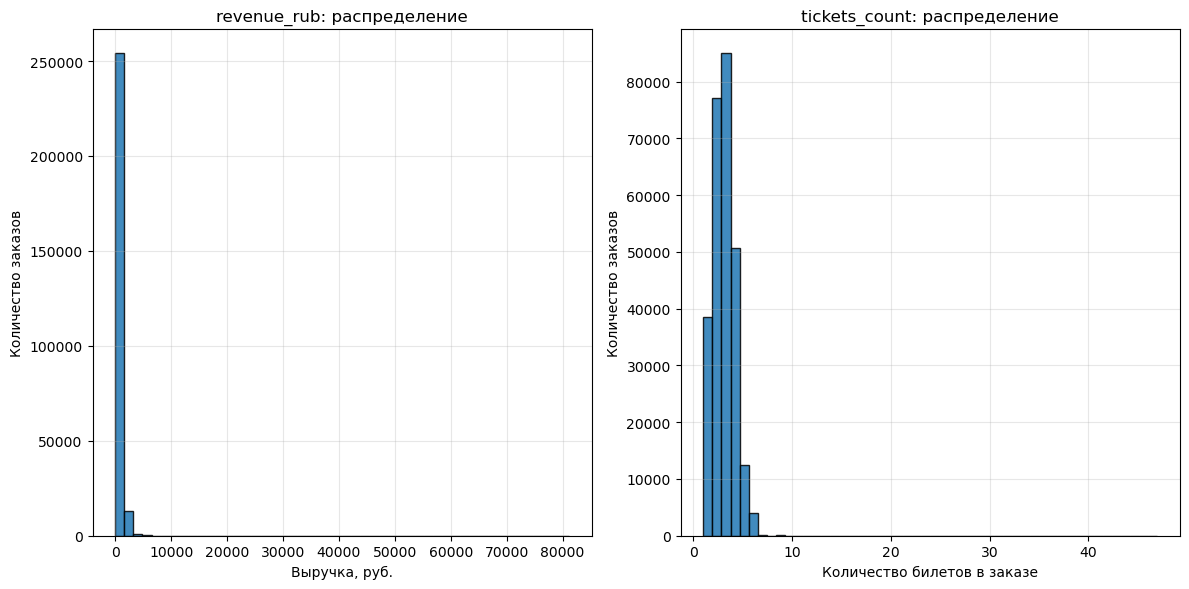

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

tickets_df['revenue_rub'].dropna().plot(kind='hist', bins=50, ax=axes[0], edgecolor='black', alpha=0.85,
                                       title='revenue_rub: распределение')
axes[0].set_xlabel('Выручка, руб.')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

tickets_df['tickets_count'].dropna().plot(kind='hist', bins=50, ax=axes[1], edgecolor='black', alpha=0.85,
                                          title='tickets_count: распределение')
axes[1].set_xlabel('Количество билетов в заказе')
axes[1].set_ylabel('Количество заказов')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



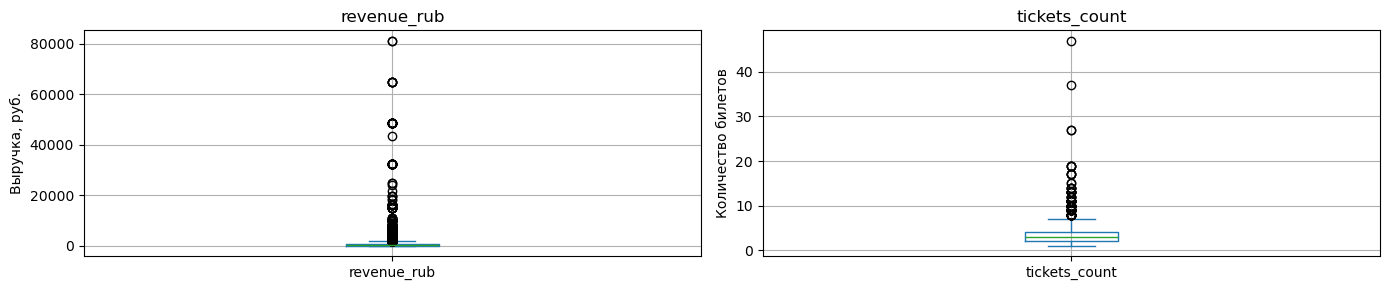

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

tickets_df[['revenue_rub']].plot(kind='box', ax=axes[0], grid=True, title='revenue_rub')
tickets_df[['tickets_count']].plot(kind='box', ax=axes[1], grid=True, title='tickets_count')
axes[0].set_ylabel('Выручка, руб.')
axes[1].set_ylabel('Количество билетов')
plt.tight_layout()
plt.show()


In [19]:
before_n = len(tickets_df)

p99 = tickets_df['revenue_rub'].quantile(0.99)
mask_keep = tickets_df['revenue_rub'] <= p99

filtered_df = tickets_df[mask_keep].copy()

after_n = len(filtered_df)
dropped_n = before_n - after_n
dropped_share = dropped_n / before_n if before_n else 0

summary_filter = pd.DataFrame({
    'Показатель': ['Всего строк до', 'Всего строк после', 'Удалено строк', 'Доля удалённых', 'p99 revenue_rub'],
    'Значение': [before_n, after_n, dropped_n, round(dropped_share, 4), round(float(p99), 2)]
})

display(summary_filter)


,Показатель,Значение
0,Всего строк до,267961.0000
1,Всего строк после,265321.0000
2,Удалено строк,2640.0000
3,Доля удалённых,0.0099
4,p99 revenue_rub,2628.4200


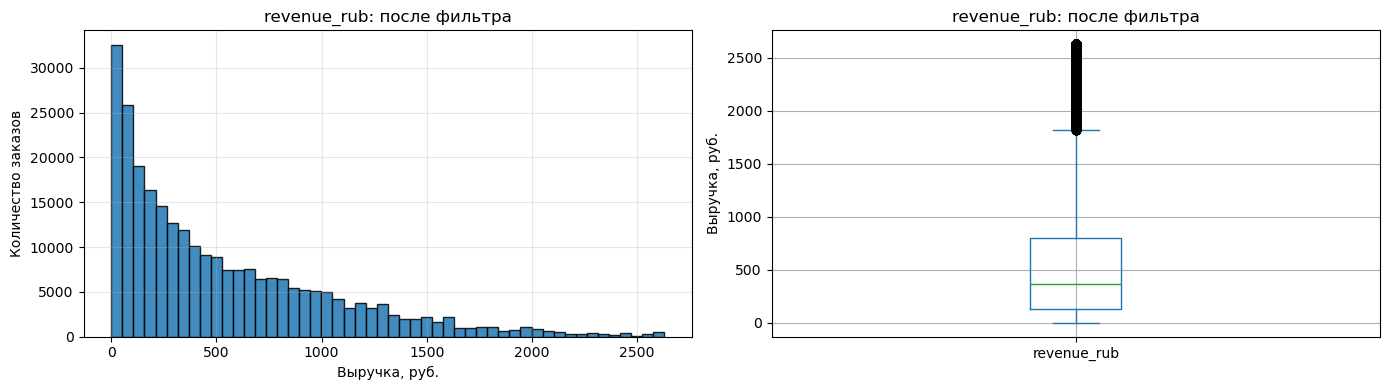

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

filtered_df['revenue_rub'].dropna().plot(kind='hist', bins=50, ax=axes[0], edgecolor='black', alpha=0.85,
                                        title='revenue_rub: после фильтра')
axes[0].set_xlabel('Выручка, руб.')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

filtered_df[['revenue_rub']].plot(kind='box', ax=axes[1], grid=True, title='revenue_rub: после фильтра')
axes[1].set_ylabel('Выручка, руб.')
plt.tight_layout()
plt.show()


### Промежуточный вывод по шагу 2

- Привели `order_dt` и `order_ts` к типу `datetime`, чтобы корректно сортировать покупки по времени.
- Выручку привели к единой валюте (рубли): для заказов в тенге использовали курс из файла с ежедневными значениями и рассчитали новый столбец `revenue_rub`.
- Проверили пропуски: ожидаемо основная доля пропусков — в `days_since_prev` (для пользователей с одной покупкой).
- Привели типы числовых столбцов к более компактным и удобным для анализа, проверили категории в ключевых номинальных признаках.
- Проверили распределения `revenue_rub` и `tickets_count`. Для `revenue_rub` отфильтровали выбросы по 99‑му перцентилю (см. таблицу и графики выше) их меньше 3000, также проверили `revenue_rub`<=0 их меньше 6000, в сумме мы удалили практически 9000 строк, что составляет менее 3% от всего количество строк.
- Также удалил не явные пропуски(одинаковые заказы, у которыхразница меньше 2 минут), их было 16000, что составляет примерно 6%.
- Для дальнейшего анализа используем очищенный датасет `filtred_df` (после фильтрации по выбросам выручки).


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Предобработка данных <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> C задачей в целом справились, предобработку провели!
</div>
<div style="border-radius: 10px" class="alert alert-block alert-danger">
 
<b>Нужно доработать ❌:</b>

* В задании это не указывается, но по умолчанию важным шагом предварительного анализа и предобработки является проверка не только на наличие полных дубликатов, но, в том числе и неполных, например, если заказ пользователя задублировался в системе, был создан в нескольких экземплярах с разным `order_id` и, возможно, даже с небольшой разницей во времени, за которое человек не успел бы вручную произвести еще одну покупку. Чтобы не искажать статистические расчеты, от таких наблюдений тоже важно избавляться. Но для начала нужно проверить их наличие - для этого необходимо проверить, есть ли дубликаты на подвыборке без `order_id` и `days_since_prev` (можно также поэкспериментировать с округлением времени создания заказа). Если обнаружим их и примем решение удалить, то потребуется также пересчитать признак с количеством дней между заказами.

    
* Стоит также обратить внимание, что у нас есть отрицательные значения выручки. Возможно, это какие-то возвраты. По-хорошему, их тоже следовало бы исключить, чтобы не завышать количество валидных транзакций на пользователя. Перед этим не забываем проверить, какой процент данных потеряем, не критично ли это.


</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* В нашем случае корректнее будет предположить, что пропуски образовались не на единственных, а на первых заказах пользователей (не важно, сколько их было потом), в таком случае у них не существует предыдущего, от которого можно было бы посчитать количество дней. Было бы не лишним убедиться, что это действительно так.


* Снизить размерность типа имеет смысл уже после проведения предобработки. Причем это можно сделать для всех признаков, представленных числом.
    
    
* По этапу проверки на неявные дубликаты не оставлено никаких комментариев, читателю остается не ясно, все ли там окей.
    
    
* Если признак состоит из повторяющихся категорий, то ему можно назначить тип `category`.

    
* Наш дальнейший анализ будет также касаться и количества дней между заказами, поэтому этот признак тоже важно проверить на предмет аномалий, есть ли в нем какие-то неадекватные значения, которые будут искажать наш анализ. 
    
    
* Для удобства анализа боксплот для определенного признака можно строить над или под гистограммой, чтобы можно было сопоставлять информацию из них ([пример](https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/)). Можно даже создать пользовательскую функцию, которая будет принимать на вход признак и выводить для него сразу два типа визуализации в одном графике.

    
* При принятии решения относительно выбросов - оставляем или выбрасываем - стоит пояснять, во-первых, откуда они могли взяться, во-вторых, ввиду причины их возникновения, полезно ли будет их учитывание для целей нашего анализа. Сейчас не ясно, почему принято решение удалить выбросы, причем в той же ячейке, где их исследуешь, не видя, действительно ли они имеются.


* Для лучшей навигации по проекту было бы неплохо создать четкую последовательность действий, выделить тематические подразделы.
    
    
* Согласно стандартам оформления кода не стоит делать строки длиной более 79 символов, это портит его читаемость, вынуждает прокручивать ячейку.
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущих комментариях: ведение последовательного сторителлинга.

</div>


---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


In [21]:
df = filtered_df.copy()
df = df.sort_values(['user_id', 'order_ts'])

user_profile = (
    df.groupby('user_id', as_index=False)
      .agg(
          first_order_dt=('order_dt', 'first'),
          last_order_dt=('order_dt', 'last'),
          first_device=('device_type_canonical', 'first'),
          first_region=('region_name', 'first'),
          first_service=('service_name', 'first'),
          first_event_type=('event_type_main', 'first'),
          total_orders=('order_id', 'nunique'),
          avg_revenue_rub=('revenue_rub', 'mean'),
          avg_tickets_count=('tickets_count', 'mean'),
          avg_days_between=('days_since_prev', 'mean')
          
      )
)
user_profile['is_two'] = (user_profile['total_orders'] >= 2).astype('int8')
user_profile['is_five'] = (user_profile['total_orders'] >= 5).astype('int8')
display(user_profile.head())
user_profile.info()


,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,Каменевский регион,Край билетов,театр,1,1521.940000,4.000000,<NA>,0,0
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,Каменевский регион,Мой билет,выставки,2,774.010000,3.000000,75.0,1,0
2,000898990054619,2024-07-13,2024-10-23,mobile,Североярская область,Лови билет!,другое,3,767.213333,2.666667,51.0,1,0
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,Каменевский регион,Край билетов,театр,1,917.830000,4.000000,<NA>,0,0
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,Поленовский край,Лучшие билеты,театр,2,61.310000,1.500000,16.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21700 entries, 0 to 21699
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            21700 non-null  object        
 1   first_order_dt     21700 non-null  datetime64[ns]
 2   last_order_dt      21700 non-null  datetime64[ns]
 3   first_device       21700 non-null  object        
 4   first_region       21700 non-null  object        
 5   first_service      21700 non-null  object        
 6   first_event_type   21700 non-null  object        
 7   total_orders       21700 non-null  int64         
 8   avg_revenue_rub    21700 non-null  float64       
 9   avg_tickets_count  21700 non-null  float64       
 10  avg_days_between   13387 non-null  Float64       
 11  is_two             21700 non-null  int8          
 12  is_five            21700 non-null  int8          
dtypes: Float64(1), datetime64[ns](2), float64(2), int64(1), int8(

- Собрали агрегированный датасет `user_profile`: **одна строка = один пользователь**, а в столбцах — ключевые признаки первого заказа и поведенческие метрики.
- Добавили бинарные флаги `is_two` и `is_five` — базовые целевые признаки для оценки возврата (2+ и 5+ заказов).
- Дальше будем использовать `user_profile` как основную таблицу.


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Создание профиля пользователя <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">

<b>Отлично ✅:</b> Хорошо, что, ввиду использования агрегата `first`, не забываешь про сортировку заказов по времени!

</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> Почему задействуется неотфильтрованная таблица?
</div>

<div style="border-radius: 10px" class="alert alert-warning">

<b>Рекомендации💡:</b> Есть довольно удобный метод [assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), позволяющий дополнять таблицу новыми рассчитанными столбцами.

Тогда создание всего профиля можно будет записать красивым и удобным по структуре кодом.

<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

```python
profiles = (df
        # В начале сортируем данные по дате совершения заказа, что найти первые признаки:
        .sort_values(by='order_ts')
        # Затем группируем по номеру пользователя и агрегируем данные:
        .groupby('user_id')
        .agg(
            # Находим первую и последнюю даты заказа:
            first_order_dt=('order_dt','min'),
            last_order_dt=('order_dt','max'),
            # Находим устройства, регион, название билетного партнера и жанр мероприятия первого заказа:
            first_device=('device_type_canonical','first'),
            first_region_name=('region_name','first'),
            first_service_name=('service_name','first'),
            first_event_type=('event_type_main','first'),
            # Подсчитваем количество заказов:
            total_orders=('order_id','nunique'),
            # Считаем статистику по заказам: средняя стоимость заказа, среднее количество билетов:
            avg_revenue_rub=('revenue_rub','mean'),
            avg_tickets_count=('tickets_count','mean'),
            # Считаем среднее количество дней между покупками:
            avg_days_since_prev=('days_since_prev','mean')
        )
        # Создаем два признака: совершил ли пользователь 2 / 5 и более заказов:
        .assign(
            is_two = lambda x: x['total_orders'] >= 2,
            is_five = lambda x: x['total_orders'] >= 5
        )
        .reset_index()
)
```
</details>

</div>

**Исправил**

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [22]:
n_users = user_profile['user_id'].nunique()
avg_revenue_per_order = df['revenue_rub'].mean()

share_two = user_profile['is_two'].mean()
share_five = user_profile['is_five'].mean()

base_metrics = pd.DataFrame({
    'Метрика': [
        'Число пользователей',
        'Средняя выручка с заказа (руб.)',
        'Доля пользователей с 2+ заказами',
        'Доля пользователей с 5+ заказами'
    ],
    'Значение': [
        n_users,
        round(avg_revenue_per_order, 2),
        round(share_two, 4),
        round(share_five, 4)
    ]
})

display(base_metrics)

describe_cols = ['total_orders', 'avg_tickets_count', 'avg_days_between']
display(user_profile[describe_cols].describe(percentiles=[0.5, 0.9, 0.95, 0.99]).T)

display(user_profile.sort_values('total_orders', ascending=False).head(5))


,Метрика,Значение
0,Число пользователей,21700.0000
1,Средняя выручка с заказа (руб.),534.3900
2,Доля пользователей с 2+ заказами,0.6095
3,Доля пользователей с 5+ заказами,0.2785


,count,mean,std,min,50%,90%,95%,99%,max
total_orders,21700.0,12.226774,113.270964,1.0,2.0,14.0,29.0,140.0,9529.0
avg_tickets_count,21700.0,2.746269,0.912985,1.0,2.75,4.0,4.0,5.0,11.0
avg_days_between,13387.0,16.179698,22.581478,0.0,8.294118,42.0,62.5,114.0,148.0


,user_id,first_order_dt,last_order_dt,first_device,first_region,first_service,first_event_type,total_orders,avg_revenue_rub,avg_tickets_count,avg_days_between,is_two,is_five
978,0beb8fc0c0a9ce1,2024-06-01,2024-10-31,mobile,Североярская область,Билеты в руки,концерты,9529,520.576219,2.879001,0.015008,1,1
2044,18e9aead0a393e7,2024-06-01,2024-10-31,mobile,Каменевский регион,Облачко,концерты,4071,508.400117,2.784574,0.035135,1,1
10997,8187dac4be757a0,2024-06-01,2024-10-31,mobile,Берёзовская область,Билеты в руки,концерты,3661,558.829538,2.750341,0.039344,1,1
5381,3ee7dc2e115847f,2024-06-01,2024-10-31,mobile,Каменевский регион,Мой билет,концерты,3536,548.495179,2.767251,0.039038,1,1
10736,7eb4fc207ecc10f,2024-06-01,2024-10-31,mobile,Каменевский регион,Билеты без проблем,театр,3327,571.545438,2.917343,0.042694,1,1


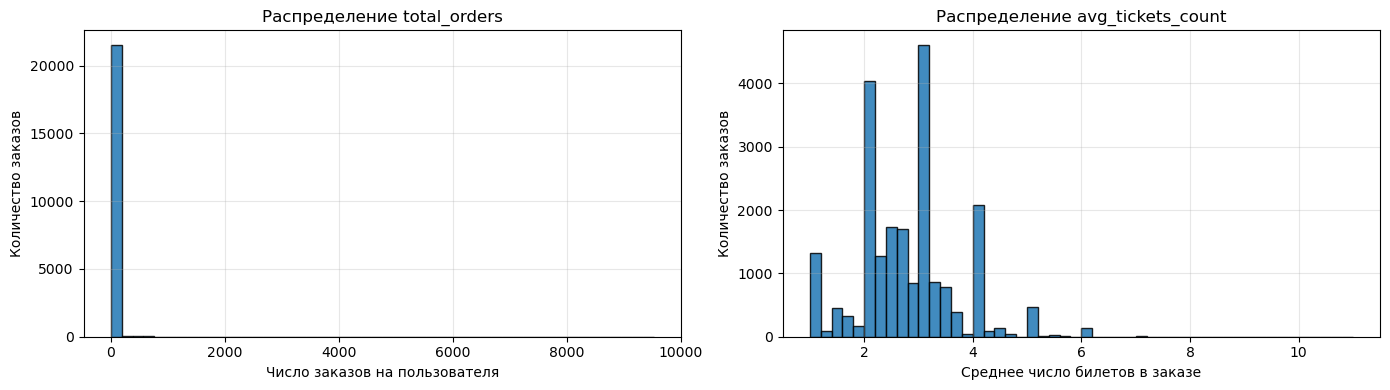

,Показатель,Значение
0,Пользователей до,21700.0000
1,Пользователей после,21295.0000
2,Отфильтровано,405.0000
3,Доля отфильтрованных,0.0187
4,p99 total_orders,140.0000
5,p99 avg_tickets_count,5.0000


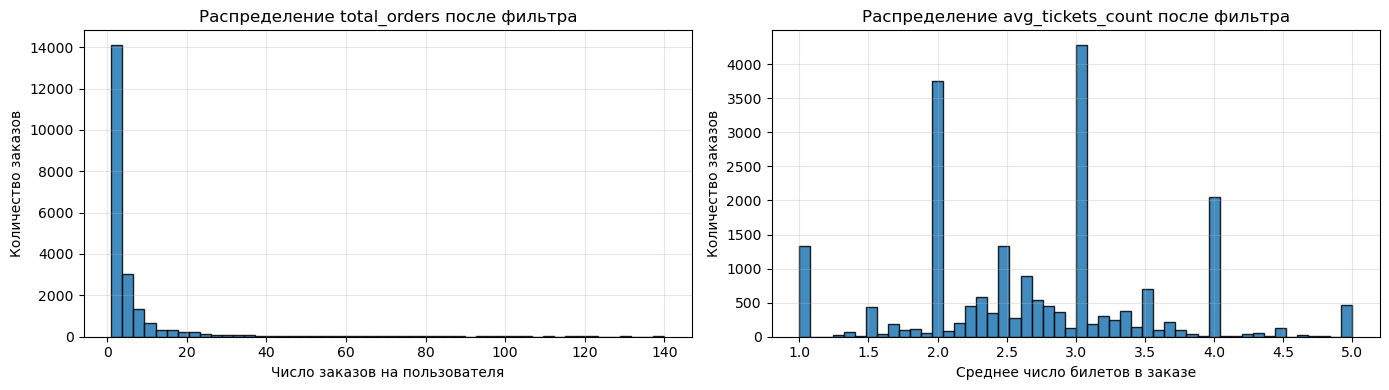

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

user_profile['total_orders'].plot(kind='hist', bins=50, ax=axes[0], edgecolor='black', alpha=0.85,
                                 title='Распределение total_orders')
axes[0].set_xlabel('Число заказов на пользователя')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

user_profile['avg_tickets_count'].plot(kind='hist', bins=50, ax=axes[1], edgecolor='black', alpha=0.85,
                                      title='Распределение avg_tickets_count')
axes[1].set_xlabel('Среднее число билетов в заказе')
axes[1].set_ylabel('Количество заказов')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

p99_orders = user_profile['total_orders'].quantile(0.99)
p99_tickets = user_profile['avg_tickets_count'].quantile(0.99)

before_users = len(user_profile)
user_profile_clean = user_profile[
    (user_profile['total_orders'] <= p99_orders) &
    (user_profile['avg_tickets_count'] <= p99_tickets)
].copy()
after_users = len(user_profile_clean)

filter_info = pd.DataFrame({
    'Показатель': ['Пользователей до', 'Пользователей после', 'Отфильтровано', 'Доля отфильтрованных',
                  'p99 total_orders', 'p99 avg_tickets_count'],
    'Значение': [before_users, after_users, before_users - after_users,
                round((before_users - after_users) / before_users if before_users else 0, 4),
                float(p99_orders), float(p99_tickets)]
})
display(filter_info)

# Для дальнейшего анализа используем очищенный профиль
user_profile = user_profile_clean

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

user_profile['total_orders'].plot(kind='hist', bins=50, ax=axes[0], edgecolor='black', alpha=0.85,
                                 title='Распределение total_orders после фильтра')
axes[0].set_xlabel('Число заказов на пользователя')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True, alpha=0.3)

user_profile['avg_tickets_count'].plot(kind='hist', bins=50, ax=axes[1], edgecolor='black', alpha=0.85,
                                      title='Распределение avg_tickets_count после фильтра')
axes[1].set_xlabel('Среднее число билетов в заказе')
axes[1].set_ylabel('Количество заказов')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


- Рассчитали базовые метрики по выборке (число пользователей, средняя выручка с заказа, доли пользователей с 2+ и 5+ заказами).
- Проверили статистики и распределения ключевых признаков профиля (`total_orders`, `avg_tickets_count`) и посмотрели на пользователей из «хвоста» по числу заказов.
- Чтобы аномальные значения не искажали аналитику, применили фильтрацию по 99‑му перцентилю для `total_orders` и `avg_tickets_count`. Удали 215 аккаунтов (1%).


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ пользовательских профилей <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Выполнены все необходимые шаги!
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* Решение по выбросом пояснено слишком поверхностно. Действительно ли количество билетов требовало повторной фильтрации?
    
    
* Было бы не лишним также проверить, насколько изменились показатели возвращаемости и средней выручки после фильтрации.


</div>


---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.

In [24]:
# Вспомогательные функции для сегментации и визуализации

def segment_distribution(df, col, top_n=None):
    s = df[col].fillna('unknown').astype(str)
    counts = s.value_counts(dropna=False)
    if top_n is not None and len(counts) > top_n:
        top = counts.head(top_n)
        rest = counts.iloc[top_n:].sum()
        counts = pd.concat([top, pd.Series({'other': rest})])
    out = counts.rename('users').to_frame()
    out['share'] = out['users'] / out['users'].sum()
    return out.reset_index(names=col)

def return_rate_by_segment(df, col, target='is_two', top_n=None):
    s = df[col].fillna('unknown').astype(str)
    tmp = df.copy()
    tmp[col] = s

    g = (tmp.groupby(col, as_index=False)
         .agg(users=('user_id', 'nunique'),
              return_rate=(target, 'mean')))

    g = g.sort_values('users', ascending=False)

    if top_n is not None and len(g) > top_n:
        top = g.head(top_n).copy()
        other = pd.DataFrame({
            col: ['other'],
            'users': [g.iloc[top_n:]['users'].sum()],
            'return_rate': [np.average(g.iloc[top_n:]['return_rate'], weights=g.iloc[top_n:]['users'])]
        })
        g = pd.concat([top, other], ignore_index=True)

    g['share'] = g['users'] / g['users'].sum()
    return g

def plot_return_rate(g, segment_col, title, top_n=None):
    g_plot = g.copy()
    if top_n is not None:
        g_plot = g_plot.sort_values('users', ascending=False).head(top_n)

    g_plot = g_plot.sort_values('return_rate', ascending=False)

    fig = plt.figure(figsize=(10, 5))
    plt.bar(g_plot[segment_col].astype(str), g_plot['return_rate'])
    plt.title(title)
    plt.ylabel('Доля пользователей с 2+ заказами')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


In [25]:
segments = {
    'first_event_type': None,
    'first_device': None,
    'first_region': 10,    
    'first_service': 10     
}

for col, top_n in segments.items():
    dist = segment_distribution(user_profile, col, top_n=top_n)
    display(dist.head(15))

,first_event_type,users,share
0,концерты,9564,0.449120
1,другое,5142,0.241465
2,театр,4225,0.198403
3,стендап,1102,0.051749
4,спорт,753,0.035360
5,выставки,412,0.019347
6,ёлки,97,0.004555


,first_device,users,share
0,mobile,17652,0.828927
1,desktop,3643,0.171073


,first_region,users,share
0,Каменевский регион,6919,0.324912
1,Североярская область,3733,0.175299
2,Широковская область,1219,0.057243
3,Озернинский край,674,0.031651
4,Малиновоярский округ,523,0.024560
5,Шанырский регион,465,0.021836
6,Светополянский округ,460,0.021601
7,Травяная область,458,0.021507
8,Речиновская область,442,0.020756
9,Яблоневская область,406,0.019066


,first_service,users,share
0,Билеты без проблем,4896,0.229913
1,Мой билет,2974,0.139657
2,Лови билет!,2784,0.130735
3,Билеты в руки,2529,0.118760
4,Облачко,2185,0.102606
5,Весь в билетах,1280,0.060108
6,Лучшие билеты,1172,0.055036
7,Прачечная,581,0.027283
8,Край билетов,458,0.021507
9,Дом культуры,355,0.016671


#### Вывод по задаче 4.1.1

- Оценили распределение пользователей по признакам первого заказа и выявили, где сосредоточена основная аудитория.
- Для признаков с большим числом категорий (регионы/операторы) выводили top‑10 сегментов и объединяли остальных в `other`, чтобы фокусироваться на основных точках входа.

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


,first_event_type,users,return_rate,share
2,концерты,9564,0.610937,0.449120
1,другое,5142,0.594127,0.241465
5,театр,4225,0.630296,0.198403
4,стендап,1102,0.605263,0.051749
3,спорт,753,0.541833,0.035360
0,выставки,412,0.638350,0.019347
6,ёлки,97,0.567010,0.004555


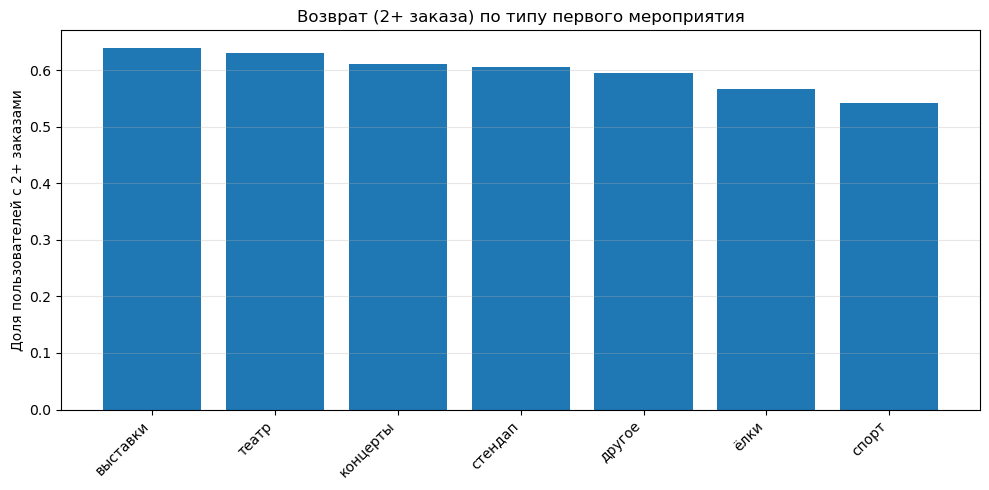

,first_device,users,return_rate,share
1,mobile,17652,0.603388,0.828927
0,desktop,3643,0.632171,0.171073


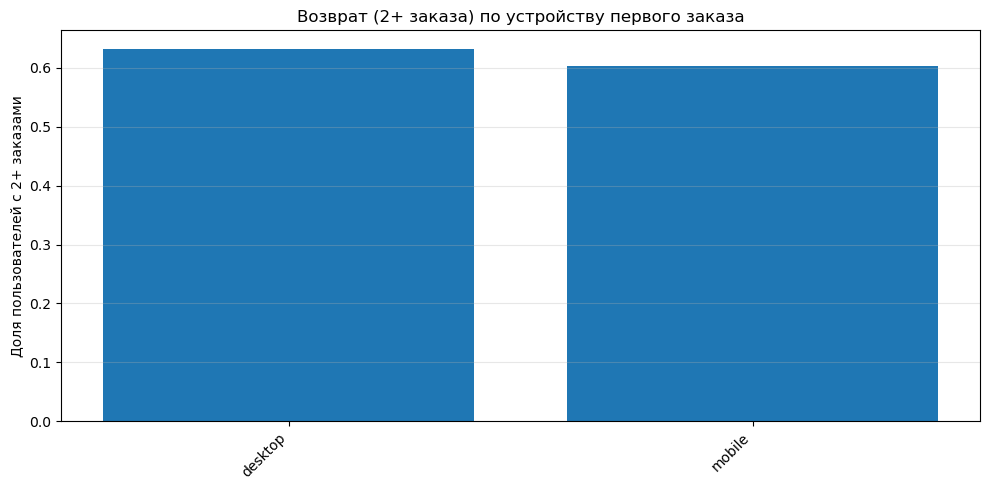

,first_region,users,return_rate,share
0,Каменевский регион,6919,0.614540,0.324912
1,Североярская область,3733,0.636485,0.175299
2,Широковская область,1219,0.642330,0.057243
3,Озернинский край,674,0.540059,0.031651
4,Малиновоярский округ,523,0.552581,0.024560
5,Шанырский регион,465,0.681720,0.021836
6,Светополянский округ,460,0.650000,0.021601
7,Травяная область,458,0.617904,0.021507
8,Речиновская область,442,0.628959,0.020756
9,Яблоневская область,406,0.596059,0.019066


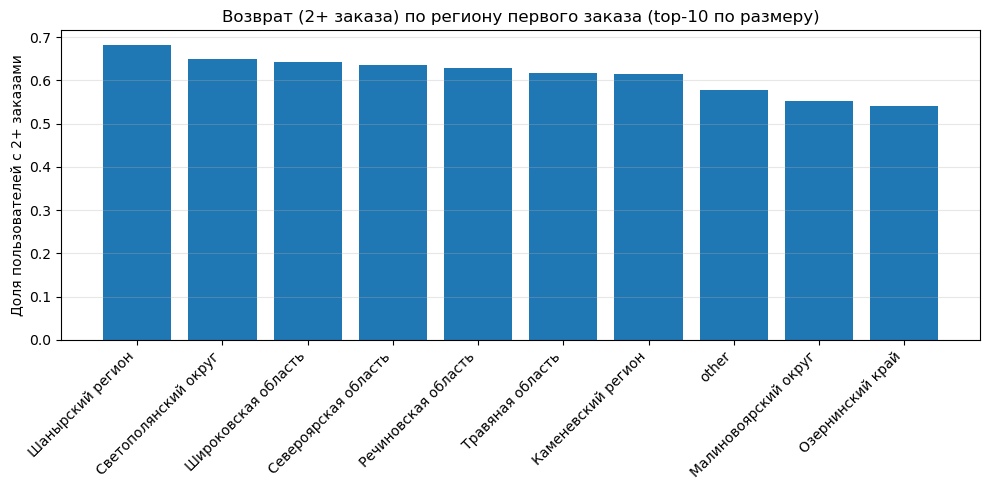

,first_service,users,return_rate,share
0,Билеты без проблем,4896,0.595180,0.229913
1,Мой билет,2974,0.602892,0.139657
2,Лови билет!,2784,0.605603,0.130735
3,Билеты в руки,2529,0.626335,0.118760
4,Облачко,2185,0.605034,0.102606
5,Весь в билетах,1280,0.623437,0.060108
6,Лучшие билеты,1172,0.610068,0.055036
7,Прачечная,581,0.619621,0.027283
8,Край билетов,458,0.648472,0.021507
9,Дом культуры,355,0.645070,0.016671


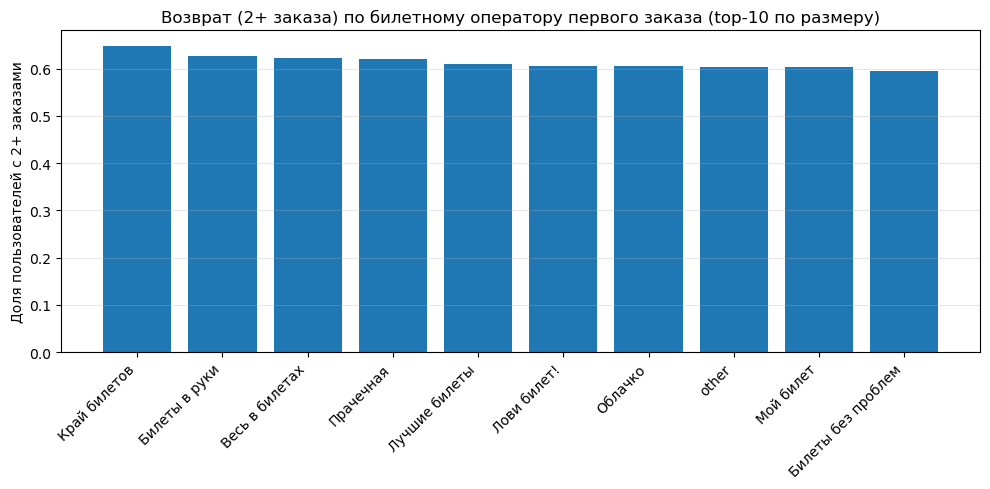

In [26]:
# event type
g_event = return_rate_by_segment(user_profile, 'first_event_type', top_n=None)
display(g_event.sort_values('users', ascending=False).head(15))
plot_return_rate(g_event, 'first_event_type', 'Возврат (2+ заказа) по типу первого мероприятия')

# device
g_device = return_rate_by_segment(user_profile, 'first_device', top_n=None)
display(g_device)
plot_return_rate(g_device, 'first_device', 'Возврат (2+ заказа) по устройству первого заказа')

# region (top 10)
g_region = return_rate_by_segment(user_profile, 'first_region', top_n=10)
display(g_region)
plot_return_rate(g_region.sort_values('users', ascending=False).head(10), 'first_region',
                 'Возврат (2+ заказа) по региону первого заказа (top-10 по размеру)')

# service (top 10)
g_service = return_rate_by_segment(user_profile, 'first_service', top_n=10)
display(g_service)
plot_return_rate(g_service.sort_values('users', ascending=False).head(10), 'first_service',
                 'Возврат (2+ заказа) по билетному оператору первого заказа (top-10 по размеру)')

Нет прям выделенного сегмента, в котором пользователи чаще возвращаются, везде примерно 60%.

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

,Сегмент,users,return_rate_is_two
0,спорт,753,0.541833
1,концерты,9564,0.610937


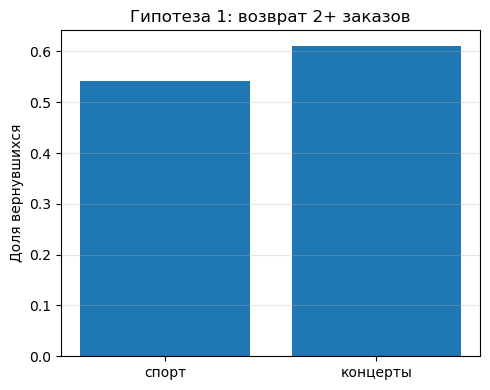

,region_group,users,return_rate_is_two
0,other regions,5996,0.578886
1,top-10 regions,15299,0.619844


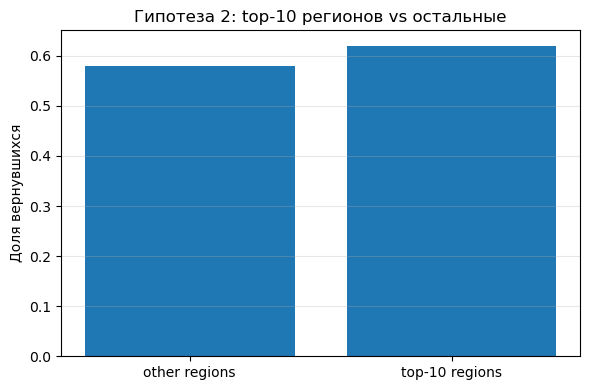

In [27]:
# Гипотеза 1: спорт vs концерты
tmp = user_profile.copy()
tmp['first_event_type_lc'] = tmp['first_event_type'].fillna('unknown').astype(str).str.lower()

sport_mask = tmp['first_event_type_lc'].str.contains('спорт', na=False)
concert_mask = tmp['first_event_type_lc'].str.contains('концерт', na=False)

h1 = pd.DataFrame({
    'Сегмент': ['спорт', 'концерты'],
    'users': [tmp.loc[sport_mask, 'user_id'].nunique(), tmp.loc[concert_mask, 'user_id'].nunique()],
    'return_rate_is_two': [tmp.loc[sport_mask, 'is_two'].mean(), tmp.loc[concert_mask, 'is_two'].mean()]
})
display(h1)

fig = plt.figure(figsize=(5, 4))
plt.bar(h1['Сегмент'], h1['return_rate_is_two'])
plt.title('Гипотеза 1: возврат 2+ заказов')
plt.ylabel('Доля вернувшихся')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Гипотеза 2: top-10 регионов vs остальные
region_users = (tmp.groupby('first_region', as_index=False)
                .agg(users=('user_id', 'nunique'),
                     return_rate=('is_two', 'mean'))
                .sort_values('users', ascending=False))

top_regions = set(region_users.head(10)['first_region'].astype(str))
tmp['region_group'] = np.where(tmp['first_region'].astype(str).isin(top_regions), 'top-10 regions', 'other regions')

h2 = tmp.groupby('region_group', as_index=False).agg(
    users=('user_id', 'nunique'),
    return_rate_is_two=('is_two', 'mean')
)
display(h2)

fig = plt.figure(figsize=(6, 4))
plt.bar(h2['region_group'], h2['return_rate_is_two'])
plt.title('Гипотеза 2: top-10 регионов vs остальные')
plt.ylabel('Доля вернувшихся')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

,first_region,users,return_rate,share
0,Каменевский регион,6919,0.614540,0.324912
1,Североярская область,3733,0.636485,0.175299
2,Широковская область,1219,0.642330,0.057243
3,Озернинский край,674,0.540059,0.031651
4,Малиновоярский округ,523,0.552581,0.024560
5,Шанырский регион,465,0.681720,0.021836
6,Светополянский округ,460,0.650000,0.021601
7,Травяная область,458,0.617904,0.021507
8,Речиновская область,442,0.628959,0.020756
9,Яблоневская область,406,0.596059,0.019066


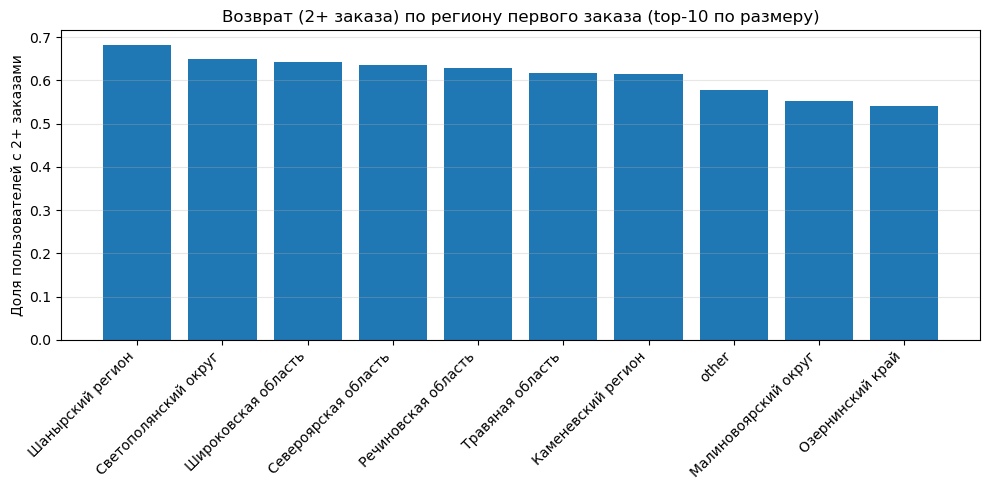

In [28]:
# region (top 10)
g_region = return_rate_by_segment(user_profile, 'first_region', top_n=10)
display(g_region)
plot_return_rate(g_region.sort_values('users', ascending=False).head(10), 'first_region',
                 'Возврат (2+ заказа) по региону первого заказа (top-10 по размеру)')

- Гипотеза 1: не подтвердилась, это было заметно ещё в прошлом анализе, так как пользователи, которые в свой первый раз посетили спортивное мероприятие, возвращаются с самой меньшей вероятностью.
- ~~Гипотеза 2: подтвердилась, в среднем количество пользователей в регионе коррелирует положительно с вероятностью повторного заказа.~~
- Гипотеза 2: не подтвердилась, так как выводы из маленьких регионах подвержены колебаниям, рассмотрим топ 10 регионов, как мы видим по данным, количество пользователей в регионе практиечски не коррелирует с шансом на повторный заказ.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ сегментов пользователей <a class="tocSkip"></h4>
    
<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здорово, что создаешь функции для выполнения повторяющиеся действия! Это облегчает код и уменьшает влияние человеческого фактора.
 
</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">

<b>Нужно доработать ❌:</b> С выводами по второй гипотезе не соглашусь. Действительно, важно учитывать размерность групп при сравнении долей! В менее популярных группах 1 дополнительный пользователь имеет больший вес, а потому показатель возвращаемости у таких категорий больше подвержен колебаниям, менее стабилен. Например, если бы у нас в группу с осталными регионами попало только два региона с одним пользователем, в одном вернулось 100%, в другом 0%, среднее 50%, показательно ли это? Чтобы сделать более осознанный вывод, можно, к примеру, построить скаттерплот с отображением размера региона и возвращаемости в нем, тогда будет видно всю картину в данных и можно будет сказать, что судя по относительно крупным регионам, в стабильности которых мы более менее уверены, такой зависимости не наблюдается.
    
Но вообще, чтобы наверняка убедиться в том, что возвращаемость в непопулярных группах ниже, и это не случайное колебание, следует провести статистический тест, оценить значимость различий. Это будет изучаться в дальнейшем на курсе.

</div>    

<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 


* В случае вывода неполного набора сегментов стоит указать, какой процент от выборки они составляют, чтобы было понимание, насколько большая часть данных осталась за пределами нашего обзора.


* Также было бы неплохо добавить на графики линию общей возвращаемости по выборке, чтобы было удобно сравнивать, какие сегменты и насколько отличаются от общего показателя по выборке. Это можно сделать с помощью `plt.axhline` (горизонтальная) или `plt.axvline`(вертикальная), потребуется также добавить легенду, чтобы обозначить, что есть что. Но обращаю внимание, что ввиду различия размерности групп это должна быть возвращаемость в выборке, а не среднее между возвращаемостями по группам.
    
 
* В выводах по первым двум частям было бы неплохо также попробовать предположить, почему мы могли получить то или иное распределение по сегментам и определенный уровень возвращаемости, почему показатели оказались именно такими. Это может быть полезно в плане развития стратегий по привлечению новых пользователей. 

    
</div>

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


In [29]:
orders = df.drop_duplicates('order_id').copy()

orders['revenue_per_ticket_rub'] = np.where(
    orders['tickets_count'] > 0,
    orders['revenue_rub'] / orders['tickets_count'],
    np.nan
)

user_rev_ticket = (orders.groupby('user_id', as_index=False)
                   .agg(avg_revenue_per_ticket_rub=('revenue_per_ticket_rub', 'mean')))

user_profile = user_profile.merge(user_rev_ticket, on='user_id', how='left')

display(user_profile[['avg_revenue_rub', 'avg_revenue_per_ticket_rub']].describe())

,avg_revenue_rub,avg_revenue_per_ticket_rub
count,21295.000000,21295.000000
mean,549.849568,203.469736
std,429.224795,143.255243
min,0.070000,0.070000
25%,218.149000,87.850625
50%,473.026452,189.140611
75%,773.253095,289.834722
max,2628.421739,1825.650000


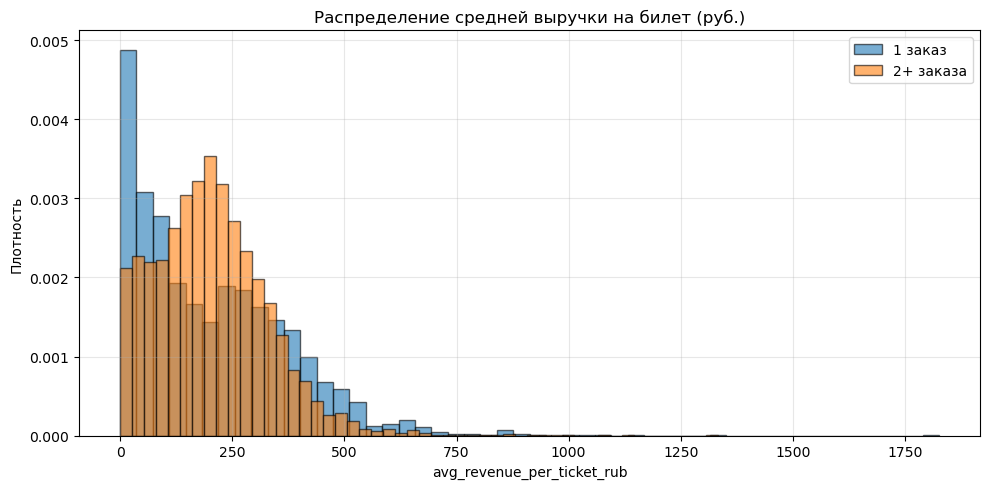

,Группа,users,mean,median
0,1 заказ,8341,203.617699,170.852500
1,2+ заказа,12954,203.374464,194.274338


In [30]:
one_time = user_profile[user_profile['is_two'] == 0]['avg_revenue_per_ticket_rub'].dropna()
returning = user_profile[user_profile['is_two'] == 1]['avg_revenue_per_ticket_rub'].dropna()
fig = plt.figure(figsize=(10, 5))
plt.hist(one_time, bins=50, density=True, alpha=0.6, edgecolor='black', label='1 заказ')
plt.hist(returning, bins=50, density=True, alpha=0.6, edgecolor='black', label='2+ заказа')
plt.title('Распределение средней выручки на билет (руб.)')
plt.xlabel('avg_revenue_per_ticket_rub')
plt.ylabel('Плотность')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

display(pd.DataFrame({
    'Группа': ['1 заказ', '2+ заказа'],
    'users': [one_time.shape[0], returning.shape[0]],
    'mean': [one_time.mean(), returning.mean()],
    'median': [one_time.median(), returning.median()]
}))

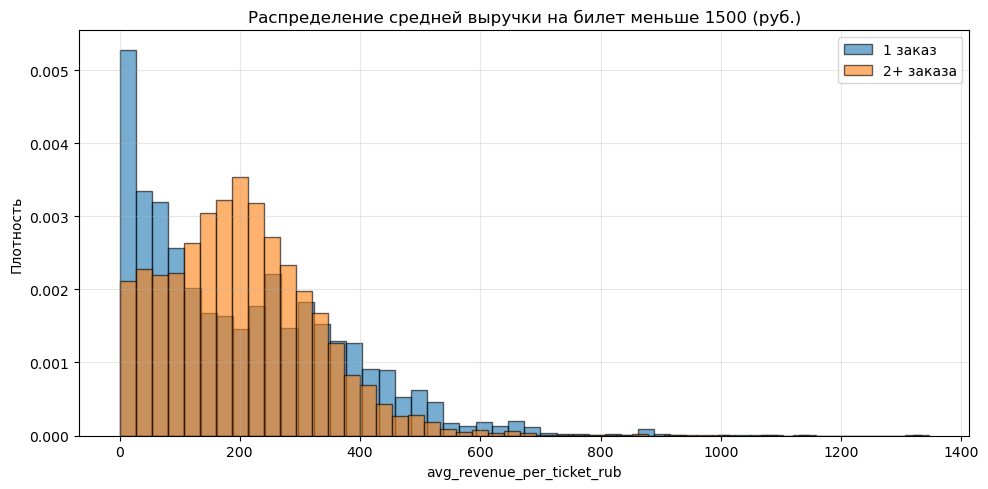

In [31]:
one_time = user_profile[(user_profile['is_two'] == 0) & (user_profile['avg_revenue_per_ticket_rub']<1500)]['avg_revenue_per_ticket_rub'].dropna()
returning = user_profile[(user_profile['is_two'] == 1) & (user_profile['avg_revenue_per_ticket_rub']<1500)]['avg_revenue_per_ticket_rub'].dropna()

fig = plt.figure(figsize=(10, 5))
plt.hist(one_time, bins=50, density=True, alpha=0.6, edgecolor='black', label='1 заказ')
plt.hist(returning, bins=50, density=True, alpha=0.6, edgecolor='black', label='2+ заказа')
plt.title('Распределение средней выручки на билет меньше 1500 (руб.)')
plt.xlabel('avg_revenue_per_ticket_rub')
plt.ylabel('Плотность')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

- Пользователи, совершившие только одну покупку, в среднем приобретают билеты более низкой стоимости по сравнению с пользователями, сделавшими два и более заказа.

- У one-time пользователей стоимость билетов преимущественно концентрируется в диапазоне 0–100 рублей, тогда как у возвращающихся пользователей основная масса покупок приходится на диапазон 150–250 рублей.

- Возможным объяснением является то, что пользователи, совершившие единственную покупку, приобретали билет по значительной скидке. После такой разовой покупки они не сформировали привычку пользоваться сервисом и в дальнейшем не возвращались.

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


,Группа,users,mean,median
0,2–4 заказа,7132,554.862180,479.285833
1,5+ заказов,5822,544.089376,523.761162


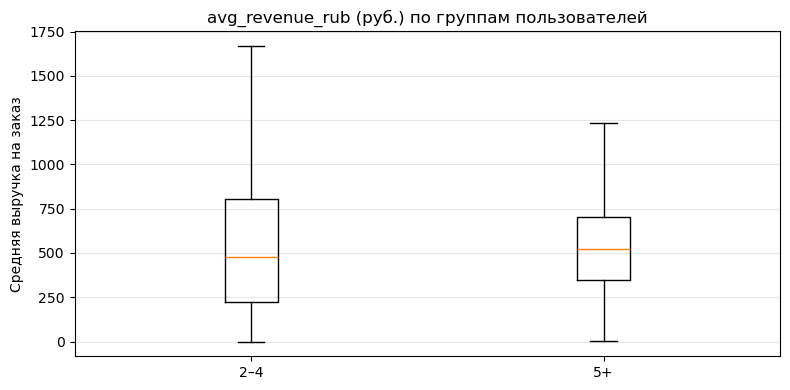

In [32]:
g_2_4 = user_profile[(user_profile['total_orders'] >= 2) & (user_profile['total_orders'] <= 4)]['avg_revenue_rub'].dropna()
g_5p = user_profile[user_profile['total_orders'] >= 5]['avg_revenue_rub'].dropna()

display(pd.DataFrame({
    'Группа': ['2–4 заказа', '5+ заказов'],
    'users': [len(g_2_4), len(g_5p)],
    'mean': [g_2_4.mean(), g_5p.mean()],
    'median': [g_2_4.median(), g_5p.median()]
}))

fig = plt.figure(figsize=(8, 4))
plt.boxplot([g_2_4, g_5p], tick_labels=['2–4', '5+'], showfliers=False)
plt.title('avg_revenue_rub (руб.) по группам пользователей')
plt.ylabel('Средняя выручка на заказ')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Медиана у 5+ выше, но средняя выручка практически не отличается.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи средней выручки и числа заказов <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Плюсик за грамотное оформление графиков - заголовок, подписи осей, легенда, поправка на размер выборки (`density`).
    
</div>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
<b>Нужно доработать ❌:</b> Здесь снова используется неотфильтрованная таблица.
    
</div>
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b>  
    
* Чтобы удобно было сопоставлять доли пользователей по диапазонам цен, можно настроить единый размер бинов (`bins = 50` фиксирует количество бинов, но размер между сегментами будет отличаться, поскольку диапазон значений у них разный). Для этого в `bins` можно передать границы для формирования бинов с шагом: `bins = range(min_value, max_value+1, 50)`, максимальное и минимальное значения при этом определяем на всей выборке, а не отдельно для каждого сегмента.
    

* Обрати внимание, что это не стоимость билетов, а выручка компании с продажи одного билета.


* Для второго случая тоже стоит построить именно гистограммы, при этом выделить сегменты концентрации - резюмировать информацию с графиков в более понятные лаконичные диапазоны, в том числе обратить внимание на хвосты. А также попробовать подумать, что для нас могут значить данные результаты, почему они могли получиться именно такими, что это говорит о клиентах, об их стабильности? 
    
    
* Напоминаю про моменты, которые уже поясняла в предыдущих комментариях: длина строки кода.


</div>

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

,tickets_segment,users,return_rate,share
1,2–3,9837,0.737115,0.461939
0,1–2,6123,0.390985,0.287532
2,3–5,5335,0.620244,0.250528
3,5+,0,NaN,0.000000


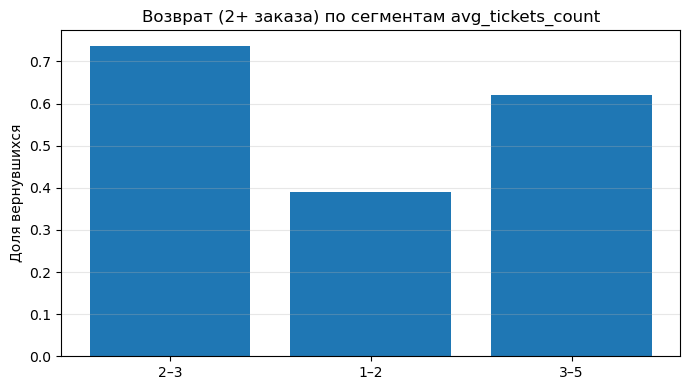

In [33]:
tmp = user_profile.copy()

bins = [1, 2, 3, 5, np.inf]
labels = ['1–2', '2–3', '3–5', '5+']

tmp['tickets_segment'] = pd.cut(tmp['avg_tickets_count'], bins=bins, labels=labels, right=True, include_lowest=True)

seg_tickets = (tmp.groupby('tickets_segment', as_index=False,observed=False)
               .agg(users=('user_id', 'nunique'),
                    return_rate=('is_two', 'mean'))
               .sort_values('users', ascending=False))

seg_tickets['share'] = seg_tickets['users'] / seg_tickets['users'].sum()
display(seg_tickets)

fig = plt.figure(figsize=(7, 4))
plt.bar(seg_tickets['tickets_segment'].astype(str), seg_tickets['return_rate'])
plt.title('Возврат (2+ заказа) по сегментам avg_tickets_count')
plt.ylabel('Доля вернувшихся')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Пользователи, которые в среднем покупают билеты только на себя, возвращаются примерно в 40% случаев. При этом те, кто чаще оформляет заказы на компанию (2+ билета), возвращаются заметно чаще.

- Максимальная доля повторных покупок(74%) — наблюдается у пользователей, которые обычно покупают 2–3 билета.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ взаимосвязи количества билетов в заказе и возвращаемости <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
    
<b>Отлично ✅:</b> Здорово, что используешь удобный метод [сut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html).
 
</div>
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> 

* Необходимо только пересмотреть настройки парметров, сейчас у тебя первый сегмент включает обе границы, а последний не включает их вовсе. Сейчас по всему диапазону у нас есть фиксированное ограничение снизу, и нет ограничения свреху, по такой же логике стоит формировать и сегменты - вклюяать левую границу и исключать правую.

 
* Столбики на графике стоит расположить в логическом порядке.
 

* В выводах было бы неплохо предположить, почему получились именно такие результаты по возвращаемости. Опять же, это может быть полезно в плане развития стратегий по привлечению новых пользователей.

</div>

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


,first_order_dow,users,return_rate
0,Monday,2876,0.618915
1,Tuesday,3129,0.610419
2,Wednesday,3021,0.618669
3,Thursday,3073,0.589326
4,Friday,3204,0.594881
5,Saturday,3264,0.625613
6,Sunday,2728,0.599707


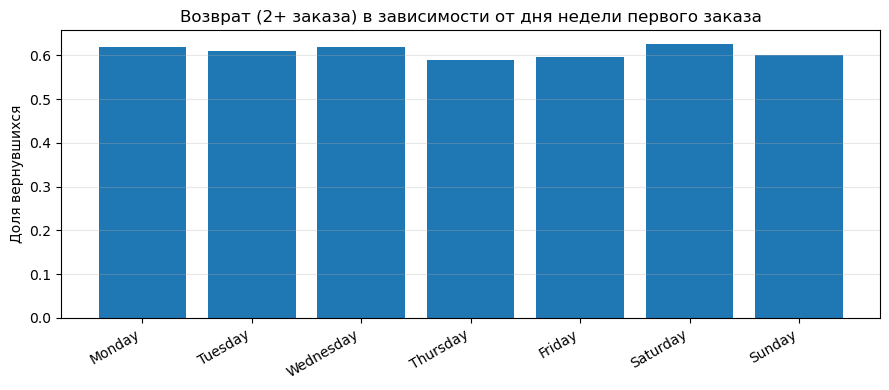

In [34]:
tmp = user_profile.copy()
tmp['first_order_dow'] = tmp['first_order_dt'].dt.day_name()

dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tmp['first_order_dow'] = pd.Categorical(tmp['first_order_dow'], categories=dow_order, ordered=True)

dow_stats = (tmp.groupby('first_order_dow', as_index=False, observed=False)
             .agg(users=('user_id', 'nunique'),
                  return_rate=('is_two', 'mean'))
             .sort_values('first_order_dow'))


display(dow_stats)

fig = plt.figure(figsize=(9, 4))
plt.bar(dow_stats['first_order_dow'].astype(str), dow_stats['return_rate'])
plt.title('Возврат (2+ заказа) в зависимости от дня недели первого заказа')
plt.ylabel('Доля вернувшихся')
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- День недели первого заказа не оказывает заметного влияния на вероятность повторной покупки.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по дням недели  <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> Здесь все корректно. Различия по дням недели все же наблюдаются, хотя и не очень заметные. Чтобы судить более однозначно, было бы неплохо сопроводить сравнение оценкой статистической значимости. Это будет изучаться далее на курсе.
</div>
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> 

* Для удобства на график можно добавить линию общей возвращаемости.


* В выводах было бы неплохо также предположить, почему в топ и антитоп (которые все-таки создается, хотя и на так явно) выбиваются определенные дни недели? Какие суждения относительно этого можно выстроить?


</div>

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


,Группа,users,mean_gap_days,median_gap_days
0,2–4 заказа,7132,21.611691,10.000
1,5+ заказов,5822,10.122364,8.375


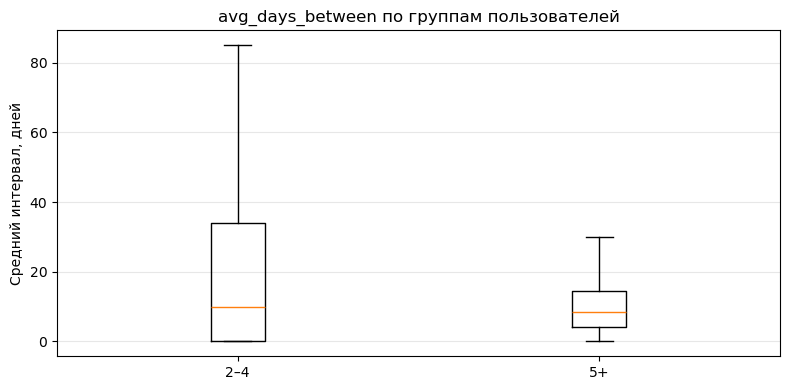

In [35]:
g_2_4_gap = user_profile[(user_profile['total_orders'] >= 2) & (user_profile['total_orders'] <= 4)]['avg_days_between'].dropna()
g_5p_gap = user_profile[user_profile['total_orders'] >= 5]['avg_days_between'].dropna()

display(pd.DataFrame({
    'Группа': ['2–4 заказа', '5+ заказов'],
    'users': [len(g_2_4_gap), len(g_5p_gap)],
    'mean_gap_days': [g_2_4_gap.mean(), g_5p_gap.mean()],
    'median_gap_days': [g_2_4_gap.median(), g_5p_gap.median()]
}))

fig = plt.figure(figsize=(8, 4))
plt.boxplot([g_2_4_gap, g_5p_gap], tick_labels=['2–4', '5+'], showfliers=False)
plt.title('avg_days_between по группам пользователей')
plt.ylabel('Средний интервал, дней')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Короткий интервал между заказами (примерно до 10–15 дней) характерен для пользователей, которые с большей вероятностью продолжают покупать и переходят в сегмент 5+ заказов.

- Длинные интервалы (особенно “редкие, но большие”) ассоциированы с тем, что пользователь остаётся на уровне 2–4 заказов и не формирует регулярность.

- Так как медианы почти одинаковые, ключевая проблема не в типичном интервале, а в том, что у части пользователей возникает долгая пауза, которая обрывает повторные покупки.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ возвращаемости по количеству дней между заказами <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> 

* По расчетам все верно!
    
   
* Логично, что на ограниченном промежутке времени у клиента с большим количеством заказов интервалы будут меньше. Поэтому здесь стоит делать обратный ход - подумать, как по интервалу времени после очередного заказа можно определять, есть ли шанс, что клиент еще вернется самостоятельно, или пора подключать стратегии для вовлечения в новый заказ.
 
</div>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Здесь удачнее бы подошли гистограммы.
   
</div>


---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

,total_orders,avg_revenue_rub,avg_revenue_per_ticket_rub,avg_tickets_count,avg_days_between,first_device,first_region,first_service,first_event_type
total_orders,1.000000,0.232040,0.098289,0.408551,0.301024,0.035296,0.118785,0.028810,0.023959
avg_revenue_rub,0.232040,1.000000,0.668046,0.489214,0.087457,0.077644,0.366851,0.377571,0.327812
avg_revenue_per_ticket_rub,0.098289,0.668046,1.000000,0.122479,0.027594,0.046235,0.384220,0.397931,0.315415
avg_tickets_count,0.408551,0.489214,0.122479,1.000000,0.174815,0.056964,0.145408,0.087954,0.095646
avg_days_between,0.301024,0.087457,0.027594,0.174815,1.000000,0.029196,0.093438,0.050727,0.049598
first_device,0.035296,0.077644,0.046235,0.056964,0.029196,1.000000,0.114497,0.083294,0.062098
first_region,0.118785,0.366851,0.384220,0.145408,0.093438,0.114497,1.000000,0.699219,0.513200
first_service,0.028810,0.377571,0.397931,0.087954,0.050727,0.083294,0.699219,1.000000,0.585827
first_event_type,0.023959,0.327812,0.315415,0.095646,0.049598,0.062098,0.513200,0.585827,1.000000


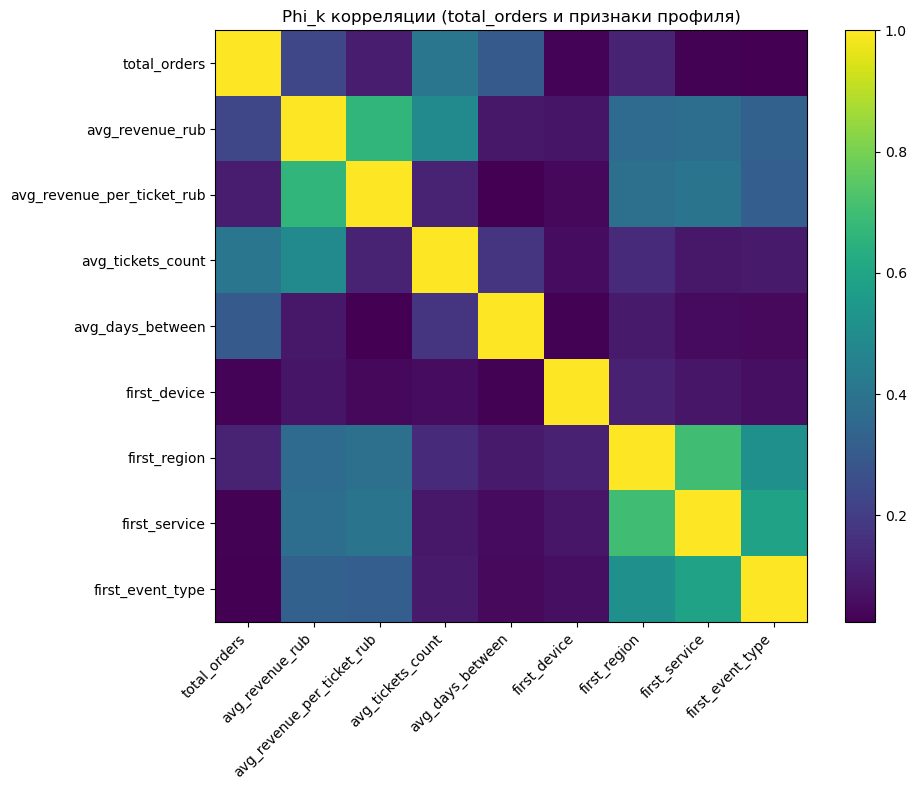

total_orders                  1.000000
avg_tickets_count             0.408551
avg_days_between              0.301024
avg_revenue_rub               0.232040
first_region                  0.118785
avg_revenue_per_ticket_rub    0.098289
first_device                  0.035296
first_service                 0.028810
first_event_type              0.023959
Name: total_orders, dtype: float64

In [36]:
corr_df = user_profile[[
    'total_orders',
    'avg_revenue_rub',
    'avg_revenue_per_ticket_rub',
    'avg_tickets_count',
    'avg_days_between',
    'first_device',
    'first_region',
    'first_service',
    'first_event_type'
]].copy()

interval_cols = ['total_orders', 'avg_revenue_rub', 'avg_revenue_per_ticket_rub', 'avg_tickets_count', 'avg_days_between']
corr_df = corr_df.dropna(subset=['total_orders'])

phi = corr_df.phik_matrix(interval_cols=interval_cols)
display(phi)

fig = plt.figure(figsize=(10, 8))
plt.imshow(phi.values)
plt.xticks(range(len(phi.columns)), phi.columns, rotation=45, ha='right')
plt.yticks(range(len(phi.index)), phi.index)
plt.title('Phi_k корреляции (total_orders и признаки профиля)')
plt.colorbar()
plt.tight_layout()
plt.show()

display(phi['total_orders'].sort_values(ascending=False))

По столбцу total_orders в матрице phi_k самые большие значения корреляции:

avg_tickets_count — 0.416
Это самая сильная связь.

avg_days_between — 0.367
Умеренная связь.

Дальше идут слабые связи, которые почти не объясняют количество заказов:

first_region — 0.076

first_device — 0.037

first_event_type — 0.033

avg_revenue_per_ticket_rub — 0.019

first_service — 0.013

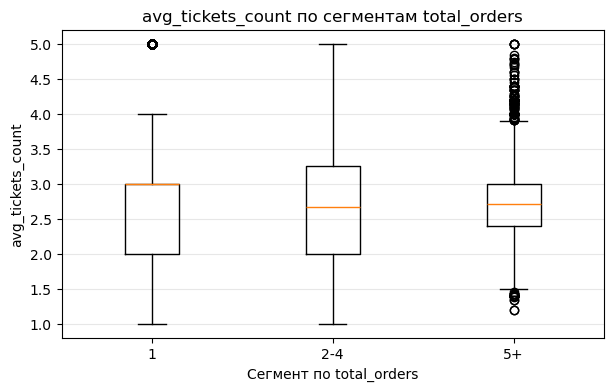

In [37]:
df = corr_df.copy()

df['orders_segment'] = pd.cut(
    df['total_orders'],
    bins=[0, 1, 4, np.inf],
    labels=['1', '2-4', '5+'],
    right=True,
    include_lowest=True
)
data = [df.loc[df['orders_segment']==seg, 'avg_tickets_count'].dropna() for seg in ['1','2-4','5+']]
plt.figure(figsize=(7,4))
plt.boxplot(data, tick_labels=['1','2-4','5+'])
plt.title('avg_tickets_count по сегментам total_orders')
plt.xlabel('Сегмент по total_orders')
plt.ylabel('avg_tickets_count')
plt.grid(True, axis='y', alpha=0.3)
plt.show()


Вывод по связям. 
По матрице phi_k наиболее сильная связь с числом заказов (total_orders) наблюдается у поведенческих метрик avg_tickets_count (φk ≈ 0.42) и avg_days_between (φk ≈ 0.37). Остальные признаки первого заказа (регион, устройство, сервис, тип события) демонстрируют слабую связь с количеством заказов (φk близко к 0), то есть сами по себе почти не объясняют различия в числе покупок.

Про направление для avg_tickets_count. Чтобы понять характер различий, мы посмотрели распределение avg_tickets_count по сегментам total_orders (1, 2–4, 5+). На boxplot видно, что в сегменте 5+ заказов распределение avg_tickets_count смещено к более высоким значениям (медиана выше, чем у сегментов 1 и 2–4). Это позволяет сделать вывод, что пользователи с большим числом заказов в среднем покупают больше билетов за один заказ — направление здесь подтверждается именно сравнением распределений по сегментам, а не коэффициентом phi_k.

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Анализ корреляции <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-block alert-danger">
    
<b>Нужно доработать ❌:</b> Phik корреляция всегда имеет положительные значения. Данная корреляция не говорит о направленности взаимосвязи, только о ее силе. Поэтому некорректно строить суждения, что чем больше что-то одно, тем больше/меньше что-то другое. О направленности мы можем лишь предполагать, полагаясь на логику и здравый смысл, либо же подкреплять суждения результатами предыдущих шагов. Если ты хочешь добавить про направленность, то важно оставить пояснение, на основе чего мы это говорим.

</div> 
   
<div style="border-radius: 10px" class="alert alert-warning">
<b>Рекомендации💡:</b> 

* В анализ имеет смысл включить день недели.

    
* Обрати внимание, что Phik бинаризует числовые признаки, поэтому их стоит задать в параметре `interval_cols`, чтобы ему не приходилось их разыскивать. При этом бинаризует он скорее из расчета имеющегося диапазона, поэтому имеет смысл создать сегменты по количеству заказов самостоятельно, чтобы они были более сбалансированы по составу, и уже с ними проверять корреляцию.
    
    
* Для удобства анализа стоит выводить значения корреляции в ячейках тепловой карты. Чтобы их отобразились, нужно добавить параметр `annot = True`.
    
    
* Расцветку для тепловой карты имеет смысл выбирать трехцветную, если диапазон возможных значений от -1 до 1 (например, синий, белый, красный, белый при этом в нуле), и двухцветную, если от 0 до 1 (в 0 - белый, в 1 - красный). Поскольку на 0 будет нейтральный цвет, величину корреляции можно будет воспринимать через интенсивность цвета, а по самому цвету - положительная она или отрицательная. Phik корреляция имеет только положительные значения.
    

*  В выводах было бы неплохо провести параллель с нашими предыдущими шагами анализа. Прокомментировать, почему высокая корреляция получается с одними признаками и низкая с другими. Что по итогу важно для манипулирования возвращаемостью клиентов, а что нет?

</div>

---

## Промежуточный общий вывод по шагу 4
В шаге 4 мы изучили, какие факторы связаны с повторными покупками (2+ заказа) и ростом числа заказов. Общая картина такая: на удержание сильнее всего влияют поведенческие характеристики пользователя, а не параметры “контекста” первого заказа (день недели, устройство и т. п.).

Ключевые наблюдения:

- Среднее число билетов в заказе (avg_tickets_count) связано с удержанием сильнее всего.
Пользователи, которые в среднем покупают билеты только на себя, возвращаются примерно в 40% случаев. При покупке 2+ билетов возврат существенно выше, а максимальная доля повторных покупок наблюдается в сегменте 2–3 билета (около 74%).

- Цена/выручка на билет отличается между группами.
Пользователи с 1 заказом чаще покупают билеты более низкой стоимости (концентрация в диапазоне 0–100 руб.), тогда как у пользователей с 2+ заказами покупки смещены в диапазон 150–250 руб.. Возможная причина — часть “одноразовых” пользователей совершает покупку по сильной скидке и не формирует привычку пользоваться сервисом.

- День недели первого заказа существенного влияния на возврат не оказывает.
Уровень повторных покупок по дням недели отличается незначительно.

- Регулярность покупок важна для роста числа заказов.
У пользователей с 5+ заказами средний интервал между покупками заметно меньше, чем у пользователей с 2–4 заказами. При этом у группы 2–4 заказа наблюдаются длинные паузы, которые, вероятно, приводят к остановке активности.

- Корреляционный анализ (phi_k) подтверждает выводы.
Наиболее связаны с количеством заказов: avg_tickets_count (phi_k ≈ 0.416) и avg_days_between (phi_k ≈ 0.367). Остальные признаки (устройство, регион, сервис, тип события первого заказа) имеют слабые связи.

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

**Данные и их подготовка**

- В работе использовались данные по пользователям и их заказам, на базе которых были рассчитаны пользовательские метрики: total_orders, is_two, avg_revenue_rub, avg_revenue_per_ticket_rub, avg_tickets_count, avg_days_between, а также признаки первого заказа (first_device, first_region, first_service, first_event_type).

- Выполнена базовая подготовка: обработка пропусков, проверка распределений и выбросов. Для корректной визуализации и сравнения распределений в отдельных местах применялась фильтрация значений.

**Основные результаты анализа**

- Признаки первого заказа слабо связаны с возвратом: день недели, устройство, регион, сервис и тип события не показывают выраженного влияния на повторные покупки.

- Поведенческие признаки — ключевые драйверы удержания:

    - пользователи, покупающие 2–3 билета, возвращаются чаще всего (примерно 74%);

    - пользователи, покупающие в среднем 1 билет, возвращаются заметно реже (около 40%).

- Ценовой фактор влияет на удержание: у “одноразовых” пользователей стоимость билетов чаще ниже, что может быть связано с покупками по сильным скидкам.

- Временные характеристики: день недели первого заказа не важен, но интервалы между заказами хорошо различают “слабых” и “сильных” пользователей — частые пользователи делают покупки с меньшими паузами.

- Корреляция phi_k с числом заказов: наиболее связаны avg_tickets_count и avg_days_between; остальные признаки имеют слабые корреляции.

**Рекомендации**

- Фокус на сегменте “2–3 билета”
Это самый перспективный сегмент по удержанию. Имеет смысл усиливать сценарии покупки “на компанию”: групповые предложения, механики “пригласи друга”, персональные подборки мероприятий, где чаще ходят вдвоём/втроём.

- Работа с риском длинных пауз
Настроить триггерные коммуникации после заказа (например, на 7–14 день и на 21–30 день): рекомендации, напоминания, персональные подборки — чтобы предотвращать уход в длинные интервалы.

- Осторожнее со “сильной скидкой на первый заказ”
Если скидка приводит к покупке крайне дешёвого билета, это может увеличивать долю “разовых” пользователей. Стоит тестировать альтернативы: бонус на второй заказ, кэшбэк после первого заказа, скидка на повторную покупку.

- Не делать ставку на статические признаки первого заказа
Устройство, регион, тип события и сервис первого заказа дают мало сигнала для удержания и числа заказов. Для таргетинга лучше использовать поведенческие признаки (avg_tickets_count, признаки регулярности, ценовой уровень).


<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Итоговые выводы <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> С задачей справились! Все ключевые моменты отражены, что позволяет быстро ознакомиться с процессом работы и результатом, не вдаваясь в технические детали. Здорово, что завершаешь проект рекомендациями, основанные на выявленных закономерностях. Предложенные рекомендации логично следуют из анализа и могут быть непосредственно реализованы в маркетинговых стратегиях подогревания и удержания. 

</div>

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

https://github.com/4danm0/Analysis_of_Yandex_Afisha

<div style="border:solid #D3D3D3 2px;  border-radius: 10px; padding: 15px">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>
<h4> Публикация в Git <a class="tocSkip"></h4>

<div style="border-radius: 10px" class="alert alert-success">
<b>Отлично ✅:</b> По ссылке есть все необходимые данные, в целом все окей.

</div>
    
<div style="border-radius: 10px" class="alert alert-warning">
    
<b>Рекомендации💡:</b> Можно заполнить `readme` полезной информацией о проекте, зафиксировать цели, указать ключевые моменты и полученные выводы.

</div>


<div style="border:solid Green 2px; border-radius: 10px;  padding: 40px">
<h3>Общий вывод по проекту <a class="tocSkip"></h3>
    
Данила, спасибо за твой проект! У тебя хорошая работа! В тебе виден будущий профессионал своего дела :) Однако есть еще моменты, которые требуют твоего внимания. Кратко пройдусь по впечатлениям. 
    
**Полнота:** все требуемые задачи были выполнены!
    
**Корректность:** 

* <span style="color:Red;">Необходимо расширить предобработку данных. Проверка на наличие явных, неявных, неполных дубликатов и невалидных значений - одни из важных этапов предобработки по умолчанию.</span>
* <span style="color:Red;">Для создания профиля и для дальнейшего анализа профилей необходимо брать отфильтрованные данные.</span>
* <span style="color:Red;">Необходимо пересмотреть выводы в отношении гипотезы по сегментам, сформированным первыми заказами.</span>
* <span style="color:Red;">Необходимо пересмотреть выводы в отношении корреляции.</span>

**Аналитическая проницательность:** ты верно подмечаешь все ключевые нюансы данных, даешь дельные рекомендации! Местами можно чуть углубить суждения, фиксировать не только то, что наблюдаем, но и предполагать, почему получилось именно так.
    
**Эффективность кода:** по этому критерию в целом тоже все супер! Используются удобные методы, функции для повторяющихся действий. Стоит добавить краткие комментарии в особо сложных моментах и обратить внимание на длину строки с кодом.
    
**Оформление:** им тоже важно не пренебрегать! Оформление тесно связано с удобством восприятия предоставляемой информации и созданием впечатления о работе. Твоя работа в целом оформлена хорошо - выделены разделы, грамотно оформлены графики. Не хватает введения, последовательного сторителлинга (в том числе стоит переформулировать задания в свои собственные исследовательские вопросы), можно расставить акценты в вывадах.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />